<a href="https://colab.research.google.com/github/AchalaVP/1BM20AI002/blob/main/AML_LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROGRAM 1

Construct a Bayesian network considering a suitable dataset.

In [ ]:
!pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


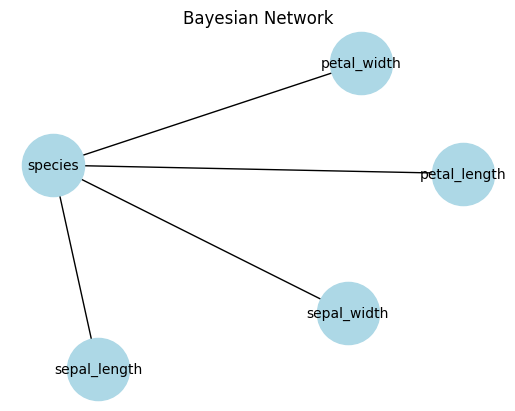

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
# Define the URL of the Iris dataset
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
# Read the Iris dataset from the URL
data = pd.read_csv(url)
# Define the Bayesian network structure
model = BayesianModel([
("sepal_length", "species"),
("sepal_width", "species"),
("petal_length", "species"),
("petal_width", "species")
])
# Estimate the CPDs from the dataset using Maximum Likelihood Estimation
model.fit(data, estimator=MaximumLikelihoodEstimator)
# Create a directed graph from the Bayesian network model
graph = nx.DiGraph(model.edges())
# Set the position of the nodes in the graph
pos = nx.spring_layout(graph)
# Draw the nodes and edges of the graph
nx.draw_networkx_nodes(graph, pos, node_size=2000, node_color="lightblue")
nx.draw_networkx_edges(graph, pos)
nx.draw_networkx_labels(graph, pos, font_size=10, font_color="black")
# Display the graph
plt.title("Bayesian Network")
plt.axis("off")
plt.show()

PROGRAM 2

Build an Artificial Neural Network by implementing the Backpropagation algorithm and test
the same using appropriate data sets.

In [ ]:
import numpy as np
import tensorflow as tf
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.W1 = tf.Variable(tf.random.normal([self.input_size, self.hidden_size]))
        self.b1 = tf.Variable(tf.random.normal([self.hidden_size]))
        self.W2 = tf.Variable(tf.random.normal([self.hidden_size, self.output_size]))
        self.b2 = tf.Variable(tf.random.normal([self.output_size]))

    def forward_pass(self, X):
        self.z1 = tf.matmul(X, self.W1) + self.b1
        self.a1 = tf.nn.sigmoid(self.z1)
        self.z2 = tf.matmul(self.a1, self.W2) + self.b2
        self.a2 = tf.nn.sigmoid(self.z2)
        return self.a2
    def backward_pass(self, X, y, learning_rate):
        with tf.GradientTape() as tape:
            outputs = self.forward_pass(X)
            loss = tf.reduce_mean(tf.losses.mean_squared_error(y, outputs))
            dLoss_dW1, dLoss_db1, dLoss_dW2, dLoss_db2 = tape.gradient(loss, [self.W1, self.b1, self.W2, self.b2])
        self.W1.assign_sub(learning_rate * dLoss_dW1)
        self.b1.assign_sub(learning_rate * dLoss_db1)
        self.W2.assign_sub(learning_rate * dLoss_dW2)
        self.b2.assign_sub(learning_rate * dLoss_db2)
    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            self.backward_pass(X, y, learning_rate)
            if epoch % 100 == 0:
                outputs = self.forward_pass(X)
                loss = tf.reduce_mean(tf.losses.mean_squared_error(y, outputs))
                print(f"Epoch {epoch}, Loss: {loss}")
# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)
nn = NeuralNetwork(input_size=2, hidden_size=2, output_size=1)
nn.train(X, y, epochs=1000, learning_rate=0.1)
outputs = nn.forward_pass(X)
print("Predictions:")
print(outputs)


Epoch 0, Loss: 0.3840550482273102
Epoch 100, Loss: 0.2815518379211426
Epoch 200, Loss: 0.25232356786727905
Epoch 300, Loss: 0.250593364238739
Epoch 400, Loss: 0.2504598796367645
Epoch 500, Loss: 0.25040122866630554
Epoch 600, Loss: 0.2503514289855957
Epoch 700, Loss: 0.2503068745136261
Epoch 800, Loss: 0.25026679039001465
Epoch 900, Loss: 0.250230610370636
Predictions:
tf.Tensor(
[[0.49504778]
 [0.5109236 ]
 [0.48841134]
 [0.50477815]], shape=(4, 1), dtype=float32)


PROGRAM 3

Demonstrate the working of the EM algorithm to cluster a set of data stored in a . CSV file.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


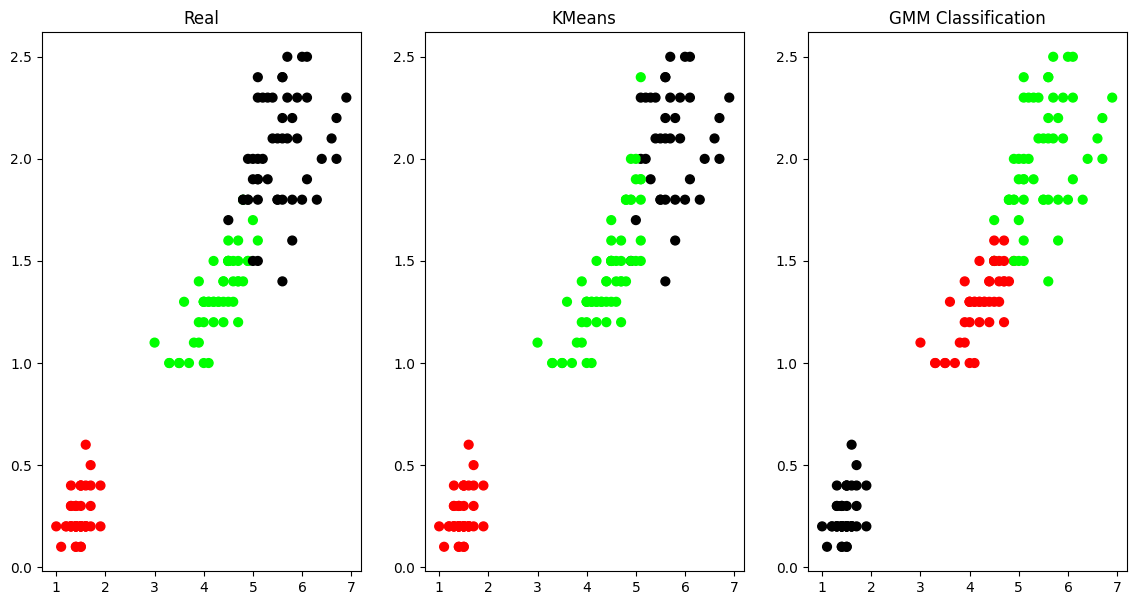

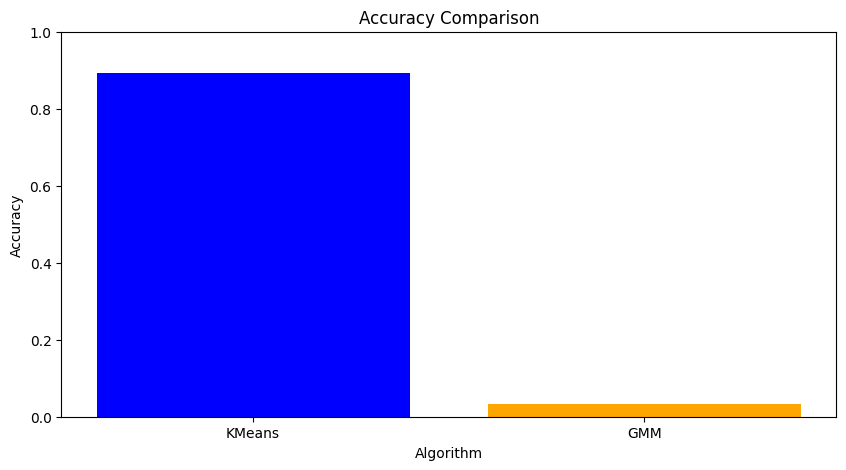

In [ ]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset=load_iris()
X=pd.DataFrame(dataset.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y=pd.DataFrame(dataset.target)
y.columns=['Targets']
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])
plt.subplot(1,3,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Real')
plt.subplot(1,3,2)
model=KMeans(n_clusters=3)
model.fit(X)
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[predY],s=40)
plt.title('KMeans')
scaler=preprocessing.StandardScaler()
scaler.fit(X)
xsa=scaler.transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
y_cluster_gmm=gmm.predict(xs)
plt.subplot(1,3,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm],s=40)
plt.title('GMM Classification')
accuracy_kmeans = sm.accuracy_score(y, predY)
accuracy_gmm = sm.accuracy_score(y, y_cluster_gmm)
plt.figure(figsize=(10, 5))
plt.bar(['KMeans', 'GMM'], [accuracy_kmeans, accuracy_gmm], color=['blue', 'orange'])
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()





PROGRAM 4

Demonstrate Pre processing (Data Cleaning, Integration and Transformation) activity on
suitable data: For example: Identify and Delete Rows that Contain Duplicate Data by
considering an appropriate dataset. Identify and Delete Columns That Contain a Single Value
by considering an appropriate dataset.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv')
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']
label_encoder = LabelEncoder()
df['ocean_proximity'] = label_encoder.fit_transform(df['ocean_proximity'])
df = df[(np.abs(df['median_house_value'] - df['median_house_value'].mean()) / df['median_house_value'].std()) < 3]
df['income_cat'] = pd.cut(df['median_income'], bins=[0, 1.5, 3.0, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])
df['rooms_per_household_bin'] = df.groupby('income_cat')['rooms_per_household'].transform('mean')
df.drop(['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'income_cat'], axis=1, inplace=True)
df = pd.get_dummies(df, columns=['ocean_proximity'])
print(df.head())



   longitude  latitude  housing_median_age  median_house_value  \
0    -122.23     37.88                41.0            452600.0   
1    -122.22     37.86                21.0            358500.0   
2    -122.24     37.85                52.0            352100.0   
3    -122.25     37.85                52.0            341300.0   
4    -122.25     37.85                52.0            342200.0   

   rooms_per_household  bedrooms_per_room  population_per_household  \
0             6.984127           0.146591                  2.555556   
1             6.238137           0.155797                  2.109842   
2             8.288136           0.129516                  2.802260   
3             5.817352           0.184458                  2.547945   
4             6.281853           0.172096                  2.181467   

   rooms_per_household_bin  ocean_proximity_0  ocean_proximity_1  \
0                 7.104916                  0                  0   
1                 7.104916              

PROGRAM 5

For a given set of training data examples stored in a .CSV file, implement and demonstrate
the Candidate-Elimination algorithm. Output a description of the set of all hypotheses
consistent with the training examples.

In [ ]:
import numpy as np
import pandas as pd
data = pd.DataFrame(data=pd.read_csv('EconomyCar.csv'))
print(data)
concepts = np.array(data.iloc[:,0:-1])
print(concepts)
target = np.array(data.iloc[:,-1])
print(target)
def learn(concepts, target):
   specific_h = concepts[0].copy()
   print("\nInitialization of specific_h and general_h")
   print(specific_h)
   general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
   print(general_h)
   for i, h in enumerate(concepts):
       if target[i] == "Yes":
           for x in range(len(specific_h)):
               if h[x] != specific_h[x]:
                   specific_h[x] = '?'
                   general_h[x][x] = '?'
       if target[i] == "No":
           for x in range(len(specific_h)):
               if h[x] != specific_h[x]:
                   general_h[x][x] = specific_h[x]
               else:
                   general_h[x][x] = '?'
       print("\nSteps of Candidate Elimination Algorithm",i+1)
       print(specific_h)
       print(general_h)
   indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
   for i in indices:
       general_h.remove(['?', '?', '?', '?', '?', '?'])
   return specific_h, general_h
s_final, g_final = learn(concepts, target)
print("\nFinal Specific_h:", s_final, sep="\n")
print("\nFinal General_h:", g_final, sep="\n")


   Japan      Honda  Blue   1980  Economy  Yes
0  Japan     Toyota  Green  1970   Sports   No
1  Japan     Toyota  Blue   1990  Economy  Yes
2     USA  Chrysler    Red  1980  Economy   No
3  Japan      Honda  White  1980  Economy  Yes
[['Japan ' 'Toyota' 'Green' 1970 'Sports']
 ['Japan ' 'Toyota' 'Blue ' 1990 'Economy']
 ['USA' 'Chrysler' 'Red' 1980 'Economy']
 ['Japan ' 'Honda' 'White' 1980 'Economy']]
['No' 'Yes' 'No' 'Yes']

Initialization of specific_h and general_h
['Japan ' 'Toyota' 'Green' 1970 'Sports']
[['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?']]

Steps of Candidate Elimination Algorithm 1
['Japan ' 'Toyota' 'Green' 1970 'Sports']
[['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?']]

Steps of Candidate Elimination Algorithm 2
['Japan ' 'Toyota' '?' '?' '?']
[['?', '?', '?', '?', '?'], ['?', '?', '?', '?', 

PROGRAM 6

Implement and demonstrate the FIND-S algorithm for finding the most specific hypothesis
based on a given set of training data samples. Read the training data from a .CSV file and show
the output for test cases. Develop an interactive program by Comparing the result by
implementing LIST THEN ELIMINATE algorithm.

FIND-S Algorithm Result: ['Japan ', '?', '?', '?', 'Economy']
LIST THEN ELIMINATE Algorithm Result: ['?', '?', '?', '?', '?']


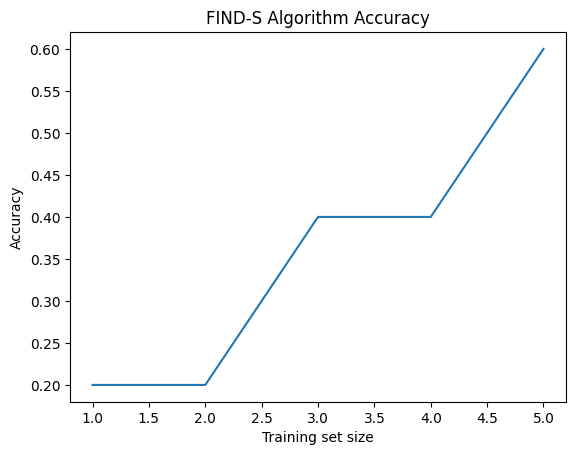

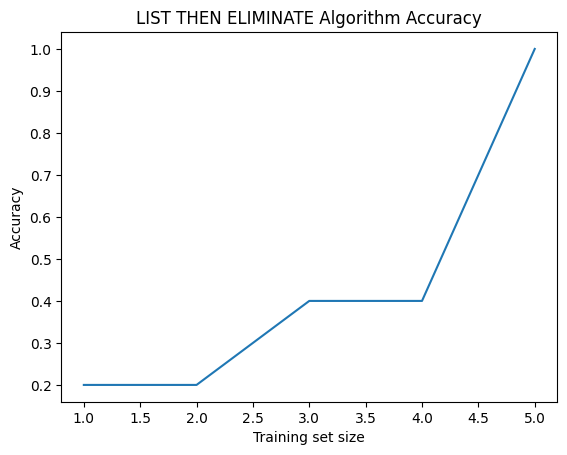

In [ ]:
import matplotlib.pyplot as plt
import csv
def load_dataset(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        dataset = [row for row in reader]
    return dataset
def find_s_algorithm(dataset):
    num_attributes = len(dataset[0]) - 1
    hypothesis = ['0'] * num_attributes
    for instance in dataset:
        if instance[-1] == 'Yes':
            for i in range(num_attributes):
                if hypothesis[i] == '0':
                    hypothesis[i] = instance[i]
                elif hypothesis[i] != instance[i]:
                    hypothesis[i] = '?'
    return hypothesis
def list_then_eliminate_algorithm(dataset):
    num_attributes = len(dataset[0]) - 1
    hypothesis = ['0'] * num_attributes
    for instance in dataset:
            if instance[-1] == 'Yes':
                for i in range(num_attributes):
                    if hypothesis[i] == '0':
                        hypothesis[i] = instance[i]
                    elif hypothesis[i] != instance[i]:
                        hypothesis[i] = '?'
    for instance in dataset:
            if instance[-1] == 'No':
                for i in range(num_attributes):
                    if hypothesis[i] == instance[i]:
                        hypothesis[i] = '?'
    return hypothesis
def calculate_accuracy(dataset, hypothesis):
    num_instances = len(dataset)
    num_correct = 0
    for instance in dataset:
        is_correct = True
        for i in range(len(hypothesis)):
            if hypothesis[i] != '?' and hypothesis[i] != instance[i]:
                is_correct = False
                break
        if is_correct:
            num_correct += 1
    return num_correct / num_instances
file_path = 'EconomyCar.csv'

dataset = load_dataset(file_path)
find_s_result = find_s_algorithm(dataset)
print("FIND-S Algorithm Result:", find_s_result)
list_then_eliminate_result = list_then_eliminate_algorithm(dataset)
print("LIST THEN ELIMINATE Algorithm Result:", list_then_eliminate_result)
find_s_accuracy_values = []
for i in range(1, len(dataset) + 1):
    hypothesis = find_s_algorithm(dataset[:i])
    accuracy = calculate_accuracy(dataset, hypothesis)
    find_s_accuracy_values.append(accuracy)
plt.plot(range(1, len(dataset) + 1), find_s_accuracy_values)
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('FIND-S Algorithm Accuracy')
plt.show()
list_then_eliminate_accuracy_values = []
for i in range(1, len(dataset) + 1):
    hypothesis = list_then_eliminate_algorithm(dataset[:i])
    accuracy = calculate_accuracy(dataset, hypothesis)
    list_then_eliminate_accuracy_values.append(accuracy)
plt.plot(range(1, len(dataset) + 1), list_then_eliminate_accuracy_values)
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('LIST THEN ELIMINATE Algorithm Accuracy')
plt.show()
